In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import os
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis

In [30]:
def line(x,a,b):
    return ((a*x) + b)

def get_data(path):
    paths_list = []
    only_filename_list = []
    for root, subdirs, files in os.walk(path):
        for file in files:
            if file[-4:] == '.csv':
                paths_list.append(os.path.join(root, file))
                only_filename_list.append(file)
    return paths_list, only_filename_list

class Data_csv:
    def __init__(self, name, data, filename, coef, intercept):
        self.name = name
        self.data = data
        self.filename = filename
        self.coef = coef
        self.intercept = intercept

paths_list, filenames_list = get_data('Data_svr')
class_data_list = []

i = 0
for i in range(len(paths_list)):
    class_data_list.append(Data_csv(paths_list[i], pd.read_csv(paths_list[i]), filenames_list[i],None, None))
    #class_data_list[i].data.drop(columns = ['Unnamed: 0'], inplace = True)
    if class_data_list[i].filename.index('C') == 1:
        class_data_list[i].data['Current'] = int(filenames_list[i][0])
    else:
        class_data_list[i].data['Current'] = int(filenames_list[i][0:2]) 
    


In [47]:
full_data = pd.DataFrame()
X = pd.DataFrame()
y = pd.DataFrame()

i = 0
for i in range(len(class_data_list)):

    full_data = pd.concat([full_data, class_data_list[i].data], ignore_index=True)

X = full_data.drop(columns=['Current'])
y = full_data['Current']

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [61]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))

y_pred = knn.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

1.0


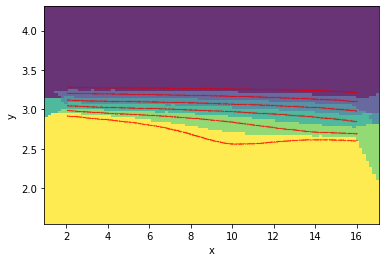

In [76]:
#_, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    knn,
    X,
    #cmap=cmap_light,
    alpha=0.8,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training and testing points
plt.scatter(X_train['x'], X_train['y'], s = 0.005, c = 'r')
#plt.title("{} (k = {})".format(name, n_neighbors))
